### Data Preparation and EDA

In [172]:
import numpy as np
import pandas as pd
df=pd.read_csv(r"C:\Users\Kofi Konadu Opoku\Desktop\Assignment4&5dataset.csv")
df.head()
                                        
    

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [173]:
df.columns=df.columns.str.lower().str.replace(' ','_')
strings=df.columns[df.dtypes=='object']
for i in strings:
    df[i]=df[i].str.lower().replace(' ','_')
 

In [174]:
df.isnull().sum()/len(df)*100
df.info()
df.describe()
df.isnull().sum()/len(df)*100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


lead_source                  8.755130
industry                     9.165527
number_of_courses_viewed     0.000000
annual_income               12.380301
employment_status            6.839945
location                     4.309166
interaction_count            0.000000
lead_score                   0.000000
converted                    0.000000
dtype: float64

In [175]:
df.duplicated().sum()

np.int64(0)

In [176]:
numerical=['annual_income','number_of_courses_viewed', 'interaction_count','lead_score']
categorical=['lead_source', 'industry', 'employment_status', 'location',]


In [177]:
# checking correlation between numerical features
df[numerical].corr()



,annual_income,number_of_courses_viewed,interaction_count,lead_score
annual_income,1.000000,0.031551,0.048618,0.005334
number_of_courses_viewed,0.031551,1.000000,-0.023565,-0.004879
interaction_count,0.048618,-0.023565,1.000000,0.009888
lead_score,0.005334,-0.004879,0.009888,1.000000


In [178]:
# checking class imbalance
df.converted.value_counts(normalize=True)

converted
1    0.619015
0    0.380985
Name: proportion, dtype: float64

### Validation Framework

In [179]:
from sklearn.model_selection import train_test_split
df_fulltrain,df_test= train_test_split(df, test_size=0.2,random_state=42)
df_train,df_val= train_test_split(df_fulltrain,test_size=0.25,random_state=42)
len(df_train),len(df_val)

(876, 293)

In [180]:
y_train= df_train['converted'].values
y_val=df_val.converted.values
y_test=df_test.converted.values


In [181]:
del df_train['converted']
del df_val['converted']
del df_test['converted']



### filling missing values

In [182]:
# filling numerical columns
df_train['annual_income']=df_train['annual_income'].fillna(df_train['annual_income'].mean())
df_val['annual_income']=df_val['annual_income'].fillna(df_train['annual_income'].mean())
df_test['annual_income']=df_test['annual_income'].fillna(df_train['annual_income'].mean())
# filling categorical columns
df_train['location']=df_train['location'].fillna(df_train['location'].mode()[0])
df_val['location']=df_val['location'].fillna(df_train['location'].mode()[0])
df_test['location']=df_test['location'].fillna(df_train['location'].mode()[0])

for i in ['lead_source', 'industry', 'employment_status']:
    df_train[i]=df_train[i].fillna('unknown')
    df_val[i]=df_val[i].fillna('unknown')
    df_test[i]=df_test[i].fillna('unknown')

# filling the missing values of the fulltrain data set for analysis of features
df_fulltrain['annual_income']=df_fulltrain['annual_income'].fillna(df_train['annual_income'].mean())
df_fulltrain['location']=df_fulltrain['location'].fillna(df_train['location'].mode()[0])
for i in ['lead_source', 'industry', 'employment_status']:
    df_fulltrain[i]=df_fulltrain[i].fillna('unknown')


### checking feature importance and  mutual information.


In [183]:
from IPython.display import display
# checking the risk ratio and difference between the features and the target variable
global_converted=df_fulltrain['converted'].mean()
for c in categorical:
    print(c)
    df_group= df_fulltrain.groupby(c).converted.agg(['mean','count'])
    df_group['diff']=df_group['mean']-global_converted
    df_group['risk ratio']=df_group['mean']/global_converted
    display(df_group)
    print( )
    print( )


lead_source


,mean,count,diff,risk ratio
lead_source,,,,
events,0.592965,199,-0.014392,0.976304
organic_search,0.615721,229,0.008364,1.013771
paid_ads,0.428571,210,-0.178785,0.705634
referral,0.786408,206,0.179051,1.294804
social_media,0.583333,216,-0.024023,0.960446
unknown,0.669725,109,0.062368,1.102688




industry


,mean,count,diff,risk ratio
industry,,,,
education,0.790210,143,0.182853,1.301064
finance,0.556886,167,-0.050470,0.916901
healthcare,0.593333,150,-0.014023,0.976911
manufacturing,0.621429,140,0.014072,1.023169
other,0.612903,155,0.005547,1.009132
retail,0.566265,166,-0.041092,0.932343
technology,0.562963,135,-0.044394,0.926907
unknown,0.557522,113,-0.049835,0.917948




employment_status


,mean,count,diff,risk ratio
employment_status,,,,
employed,0.671937,253,0.064580,1.106330
self_employed,0.635739,291,0.028382,1.046731
student,0.659722,288,0.052366,1.086219
unemployed,0.462451,253,-0.144906,0.761415
unknown,0.571429,84,-0.035928,0.940845




location


,mean,count,diff,risk ratio
location,,,,
africa,0.592857,140,-0.014500,0.976127
asia,0.588608,158,-0.018749,0.969130
australia,0.612903,155,0.005547,1.009132
europe,0.641176,170,0.033820,1.055684
middle_east,0.644172,163,0.036815,1.060615
north_america,0.609649,228,0.002292,1.003774
south_america,0.554839,155,-0.052518,0.913530


In [184]:
# mutual information
from sklearn.metrics import mutual_info_score
def mutual_info_scores(series):
    return mutual_info_score(series,df_fulltrain['converted'])
mi= df_fulltrain[categorical].apply(mutual_info_scores)
mi


lead_source          0.025665
industry             0.011685
employment_status    0.013258
location             0.001672
dtype: float64

In [185]:
df_fulltrain[numerical].corrwith(df_fulltrain.converted)

annual_income               0.063921
number_of_courses_viewed    0.442068
interaction_count           0.378482
lead_score                  0.225641
dtype: float64

### One hot encoding

In [186]:
from sklearn.feature_extraction import DictVectorizer
train_dict=df_train[categorical+numerical].to_dict(orient='records')
dv=DictVectorizer(sparse=False)
x_train=dv.fit_transform(train_dict)

val_dict=df_val[categorical+numerical].to_dict(orient='records')
x_val=dv.transform(val_dict)

test_dict=df_test[categorical+numerical].to_dict(orient='records')
x_test=dv.transform(test_dict)



### Training the model with logistic regression

In [187]:

# I trained it earlier and i had convergence warning so i have to scale it to avoid it

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)




## Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['balance'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

lead_score
number_of_courses_viewed
interaction_count
annual_income

---
**The answer to question 1 is number_of_courses_viewed:0.755011**


In [188]:
from sklearn.metrics import accuracy_score, roc_auc_score,precision_score,precision_recall_curve,recall_score
auc_scores={}
for i in numerical:
    auc=roc_auc_score(y_train,df_train[i])
    if auc<0.5:
        auc=roc_auc_score(y_train,-df_train[i])
    auc_scores[i]=auc
    print(f'{i}:{auc:3f}')
    

annual_income:0.547118
number_of_courses_viewed:0.755011
interaction_count:0.719617
lead_score:0.630443


**The auc (roc_auc_val) of the model trained is 0.92 after validation**

In [189]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(solver='liblinear',C=1.0, class_weight='balanced',max_iter=1000)
model.fit(x_train,y_train)

y_pred_prob=model.predict_proba(x_val)[:,1]
y_decision_val=y_pred_prob>=0.5

roc_auc_val=roc_auc_score(y_val,y_pred_prob)
acc_val=accuracy_score(y_val,y_decision_val)
prec_val=precision_score(y_val,y_decision_val)
rec_val=recall_score(y_val,y_decision_val)

## Question 3: Precision and Recall
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them
At which threshold precision and recall curves intersect?

0.145
0.345
0.545
0.745

In [190]:
thresholds=np.arange(0,1.01,0.01)
precision_scores=[]
recall_scores=[]

for i in thresholds:
    y_decision_val=y_pred_prob>=i

    precision= precision_score(y_val,y_decision_val,zero_division=0)
    recall=recall_score(y_val,y_decision_val)
    precision_scores.append(precision)
    recall_scores.append(recall)


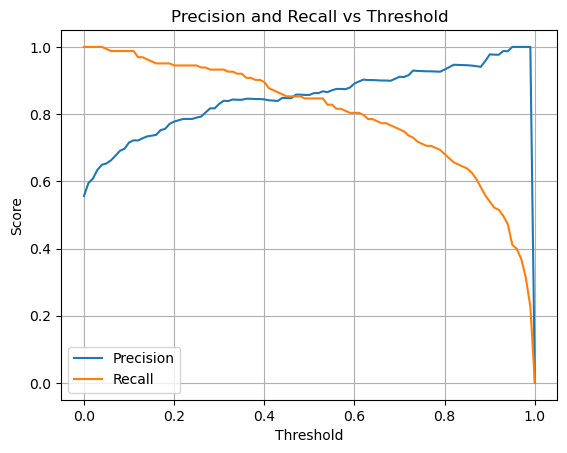

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

## Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both





Where 
P
 is precision and 
R
 is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

0.14
0.34
0.54
0.74

**The answer is 0.34**

In [192]:
# calculating f1
f1_scores={}
for t in thresholds:
    y_decision_val=y_pred_prob>=t
    precision= precision_score(y_val,y_decision_val,zero_division=0)
    recall=recall_score(y_val,y_decision_val)
    if precision + recall == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)

    f1_scores[t]=round(f1,2)
f1_scores


{np.float64(0.0): 0.71,
 np.float64(0.01): 0.75,
 np.float64(0.02): 0.76,
 np.float64(0.03): 0.78,
 np.float64(0.04): 0.79,
 np.float64(0.05): 0.79,
 np.float64(0.06): 0.79,
 np.float64(0.07): 0.8,
 np.float64(0.08): 0.81,
 np.float64(0.09): 0.82,
 np.float64(0.1): 0.83,
 np.float64(0.11): 0.83,
 np.float64(0.12): 0.83,
 np.float64(0.13): 0.83,
 np.float64(0.14): 0.83,
 np.float64(0.15): 0.83,
 np.float64(0.16): 0.83,
 np.float64(0.17): 0.84,
 np.float64(0.18): 0.84,
 np.float64(0.19): 0.85,
 np.float64(0.2): 0.85,
 np.float64(0.21): 0.86,
 np.float64(0.22): 0.86,
 np.float64(0.23): 0.86,
 np.float64(0.24): 0.86,
 np.float64(0.25): 0.86,
 np.float64(0.26): 0.86,
 np.float64(0.27): 0.87,
 np.float64(0.28): 0.87,
 np.float64(0.29): 0.87,
 np.float64(0.3): 0.88,
 np.float64(0.31): 0.88,
 np.float64(0.32): 0.88,
 np.float64(0.33): 0.88,
 np.float64(0.34): 0.88,
 np.float64(0.35000000000000003): 0.88,
 np.float64(0.36): 0.88,
 np.float64(0.37): 0.88,
 np.float64(0.38): 0.87,
 np.float64(0.3

In [193]:
from sklearn.metrics import confusion_matrix

y_decision_val = y_pred_prob >= 0.34
cm = confusion_matrix(y_val, y_decision_val)
print(cm)


[[102  28]
 [ 13 150]]


## Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation
How large is standard deviation of the scores across different folds?

0.0001
0.006
0.06
0.36Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation
How large is standard deviation of the scores across different folds?

0.0001
0.006
0.06
0.36

### Applying Cross Validation

In [194]:
def train_model(df_train,y_train,C=1.0):
    train_dict=df_train[categorical+numerical].to_dict(orient='records')
    dv=DictVectorizer(sparse=False)
    x_train=dv.fit_transform(train_dict)
    scaler= StandardScaler()
    x_train=scaler.fit_transform(x_train)
    model=LogisticRegression(C=C, class_weight='balanced',max_iter=1000)
    model.fit(x_train,y_train)
    return dv, model
    

In [195]:
dv,model=train_model(df_train,y_train,C=1.0)

In [196]:
def predict(df,dv,model,scaler):
    df_dict=df[categorical+numerical].to_dict(orient='records')
    x=dv.transform(df_dict)
    x=scaler.transform(x)
    y_pred=model.predict_proba(x)[:,1]
    return y_pred

In [197]:
y_pred=predict(df_val,dv,model,scaler)

In [198]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5, shuffle=True, random_state=42)

In [199]:
scores=[]
for train_idx,val_idx in kfold.split(df_fulltrain):
    df_train=df_fulltrain.iloc[train_idx]
    df_val=df_fulltrain.iloc[val_idx]
    y_train=df_train.converted.values
    y_val=df_val.converted.values
    
    del df_train['converted']
    del df_val['converted']
    
    dv,model=train_model(df_train,y_train,C=1.0)
    
    y_pred=predict(df_val,dv,model,scaler)
    
    auc=roc_auc_score(y_val,y_pred)
    scores.append(auc)
print(f'mean:{np.mean(scores):.4f}')    
print(f'standard deviation:{np.std(scores).4f}')    
scores

SyntaxError: invalid decimal literal (680352623.py, line 18)

## Question 6: Hyperparameter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.000001, 0.001, 1]
Initialize KFold with the same parameters as previously
Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?

0.000001
0.001
1

In [200]:
c_values=[0.000001,0.00001,0.0001,0.001,0.01,1]
results={}
for C in c_values: 
    scores=[]
    for train_idx,val_idx in kfold.split(df_fulltrain):
        df_train=df_fulltrain.iloc[train_idx]
        df_val=df_fulltrain.iloc[val_idx]
        y_train=df_train.converted.values
        y_val=df_val.converted.values
    
        del df_train['converted']
        del df_val['converted']

        dv,model=train_model(df_train,y_train,C=C)

        y_pred=predict(df_val,dv,model,scaler)

        auc=roc_auc_score(y_val,y_pred)
        scores.append(auc)
        results[C]=np.round(np.mean(scores),2)
results
        

{1e-06: np.float64(0.92),
 1e-05: np.float64(0.92),
 0.0001: np.float64(0.92),
 0.001: np.float64(0.92),
 0.01: np.float64(0.93),
 1: np.float64(0.93)}

### Testing the model

In [201]:
dv,model=train_model(df_fulltrain,df_fulltrain.converted,C=1.0)
y_pred=predict(df_test,dv,model,scaler)
auc=roc_auc_score(y_test,y_pred)
auc

0.8859236002093145